<a href="https://www.kaggle.com/code/maramalshariff/netflix?scriptVersionId=114802429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv


In [2]:
netflix_df=pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# as showen there is no null value 
#this is one of the way to check the null values
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# the second way to check if there is any missng values 
netflix_df.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       show_id   type  title  director  country  date_added  release_year  \
0       False  False  False     False    False       False         False   
1       False  False  False     False    False       False         False   
2       False  False  False     False    False       False         False   
3       False  False  False     False    False       False         False   
4       False  False  False     False    False       False         False   
...       ...    ...    ...       ...      ...         ...           ...   
8785    False  False  False     False    False       False         False   
8786    False  False  False     False    False       False         False   
8787    False  False  False     False    False       False         False   
8788    False  False  False     False    False       False         False   
8789    False  False  False     False    False       False         False   

      rating  duration  l

In [6]:
# the third way to check if there is any missng values 
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
# isna or isnull
#notice that there is no difference between isna() and isnull() methods. Both functions perform the same thing.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

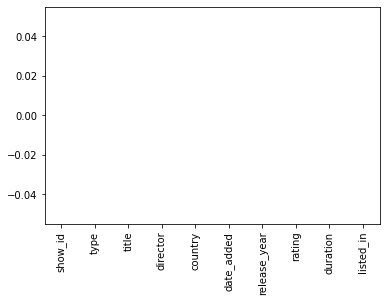

In [8]:
# the fourth way to check if there is any missng values 
#this is also one of the common ways used to detect the missing values 
import matplotlib.pyplot as plt
netflix_df.isna().sum().plot(kind='bar')
plt.show()

As there are no missing values, we can move on to the next stage of our analysis. However, if there is any missing value, we must handle it. Missing values or null values can be handled in many ways inclouding:



On the other hand, you may have to deal with missing data on your own. The first common strategy for dealing with missing data is to **delete the rows with missing values**. Typically, any row which has a missing value in any cell gets deleted. However, this often means many rows will get removed, leading to loss of information and data. Therefore, this method is **typically not used when there are few data samples.**



In python :
you could use .drop() , or dropna()


In [9]:
# this is the form of drop function :
#dataframe.drop(labels, axis, index, columns, level, inplace., errors)

# this link is going to explian each attribute :https://www.w3schools.com/python/pandas/ref_df_drop.asp     


In [10]:
# this is the form of dropna function :
#dataframe.dropna(self, axis=0, how="any", thresh=None, subset=None, inplace=False)

#When using drop only, it drops the columns/rows you define
#When using dropna, it removes all entries with NaN values (or null in general)

You can also **impute** the missing data. This can be based solely on information in the column that has missing values, or it can be based on other columns present in the dataset.



and for this technique I recommend reading this post :https://insightsoftware.com/blog/how-to-handle-missing-data-values-while-data-cleaning/

# Now and after we have done with the missing data , it is the time for examine the duplication 

In [11]:
# Count the number of duplicates
(netflix_df.duplicated()).sum()

0

In [12]:
# Extract duplicate rows
netflix_df.loc[netflix_df.duplicated(), :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


# Now and after we have done with the missing data & duplication, it is the time for examine the type proration of data

In [13]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [14]:
#we notice that the date_added column is considered as object type
#and we have to convert it into proper data type (datetime)
#we can do it using astype() function 
#Series.astype(self, dtype, copy=True, errors='raise')
#check out this : https://www.w3resource.com/pandas/series/series-astype.php

In [15]:
#Convert Pandas dataframe column type from string to datetime format using DataFrame.astype() function.
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64[ns]')

netflix_df.info()

# you can also convert it to datetime format using pd.to_datetime() function. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


As you can see, the only data types currently in use are object and int.

The object data type usually means that a Series is made up of Python strings, though it can indicate the presence of other Python objects such as lists.


However,** Why do data types matter?**
> But why does the data type of a pandas Series even matter? Data types matter mostly because they affect which operations you can perform on a given Series. 

> For example, mathematical operations can be performed on ints and floats, but those operations will fail if the numbers are stored as strings. 
The datetime type enables a rich set of date-based attributes and methods that are not possible with strings.
The category data type results in less memory usage and faster processing than strings..

**After data proration, now its time for data analysis, there is many technique for analysing data**


1. Counting unique values (1)
 value_counts(), which counts the unique values in a Series. It's best suited for a column that contains categorical rather than numerical data. 

In [16]:
#for example:
print(netflix_df.type.value_counts())
print('\n')
print(netflix_df.country.value_counts())
print('\n')
print(netflix_df.release_year.value_counts())

Movie      6126
TV Show    2664
Name: type, dtype: int64


United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64


2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64


Because value_counts() outputs a pandas Series, you can take the sum of this Series by simply adding the sum() method on the end. This is known as method chaining, a powerful technique. 

In [17]:
#for example,
print(netflix_df.release_year.value_counts().sum())
print(netflix_df.shape)
#it has to be equle to the number of rows in the case of non missing value

8790
(8790, 10)


Sometimes, while working with Python dictionaries, we can have problem in which we need to convert the values into proportions with respect to total. This can have applications in Data Science and Machine Learning domain. 

In [18]:
#here is the proportion of production's type
print(netflix_df.type.value_counts(normalize=True)*100)

#Where Movie represent 69% and TV Show 30%

Movie      69.692833
TV Show    30.307167
Name: type, dtype: float64


In [19]:
#return only the type movie
#and then return the proportion of release_year, to indicates which year has the most productions
Movie=netflix_df[netflix_df.type=='Movie']
print(Movie.release_year.value_counts(normalize=True)*100)

2018    12.520405
2017    12.487757
2016    10.741103
2019    10.333007
2020     8.439438
          ...    
1966     0.016324
1961     0.016324
1946     0.016324
1963     0.016324
1947     0.016324
Name: release_year, Length: 73, dtype: float64


In [20]:
#as showen 2018 has the highest number of movie productions.

In [21]:
#return only the TV Show
#and then return the proportion of release_year, to indicates which year has the most productions
Show=netflix_df[netflix_df.type=='TV Show']
print(Show.release_year.value_counts(normalize=True)*100)

2020    16.366366
2019    14.902402
2018    14.226727
2021    11.824324
2017     9.947447
2016     9.121622
2015     5.968468
2014     3.303303
2012     2.364865
2013     2.289790
2011     1.501502
2010     1.463964
2009     1.276276
2008     0.825826
2006     0.525526
2007     0.525526
2005     0.487988
2004     0.337838
2003     0.300300
1999     0.262763
2002     0.262763
2001     0.187688
1998     0.150150
2000     0.150150
1993     0.150150
1997     0.150150
1990     0.112613
1992     0.112613
1996     0.112613
1995     0.075075
1986     0.075075
1988     0.075075
1994     0.075075
1989     0.037538
1967     0.037538
1977     0.037538
1981     0.037538
1979     0.037538
1985     0.037538
1946     0.037538
1974     0.037538
1972     0.037538
1945     0.037538
1991     0.037538
1925     0.037538
1963     0.037538
Name: release_year, dtype: float64


In [22]:
#as showen 2020 has the highest number of movie productions.

In [23]:
# Index show_id
netflix_df_show_index = netflix_df.set_index('show_id')

In [24]:
#after changing the index to show_id
netflix_df_show_index.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [25]:
#return the proportion of most productive country
print(Movie.country.value_counts(normalize=True)*100)

United States     39.095658
India             15.932093
United Kingdom     6.317336
Not Given          4.195233
Canada             3.052563
                    ...    
Zimbabwe           0.016324
Mozambique         0.016324
Namibia            0.016324
Cameroon           0.016324
Croatia            0.016324
Name: country, Length: 79, dtype: float64


In [26]:
# return the movies prdused in last 5 years and rating = R
Rrating_last5years=netflix_df_show_index[(netflix_df_show_index.type=='Movie')&(netflix_df_show_index.release_year>=2016)&(netflix_df_show_index.rating=='R')]
print(Rrating_last5years.country.value_counts(normalize=True)*100)

United States     62.578616
United Kingdom    14.150943
Canada             5.660377
Not Given          2.201258
France             2.201258
Bulgaria           1.257862
Ireland            1.257862
Spain              0.943396
Germany            0.943396
Australia          0.943396
South Africa       0.628931
Norway             0.628931
Mexico             0.628931
New Zealand        0.628931
Hong Kong          0.628931
China              0.628931
Turkey             0.314465
Austria            0.314465
Israel             0.314465
Thailand           0.314465
Netherlands        0.314465
Serbia             0.314465
Hungary            0.314465
India              0.314465
Belgium            0.314465
Denmark            0.314465
Italy              0.314465
Chile              0.314465
Somalia            0.314465
Name: country, dtype: float64


In [27]:
#As demonstrated, the United States produced R-rated movies in the last five years.

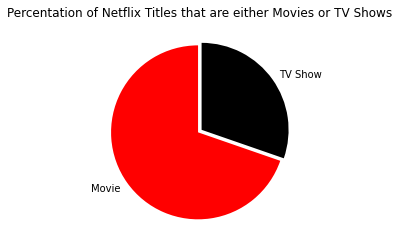

In [28]:
#We will look at the Percentation of Netflix either Movies or TV Shows
plt.figure(figsize=(12,4))
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(netflix_df_show_index.type.value_counts(),explode=(0.025,0.025), labels=netflix_df_show_index.type.value_counts().index, colors=['red','black'], startangle=90)
plt.show()


In [29]:
import seaborn as sns

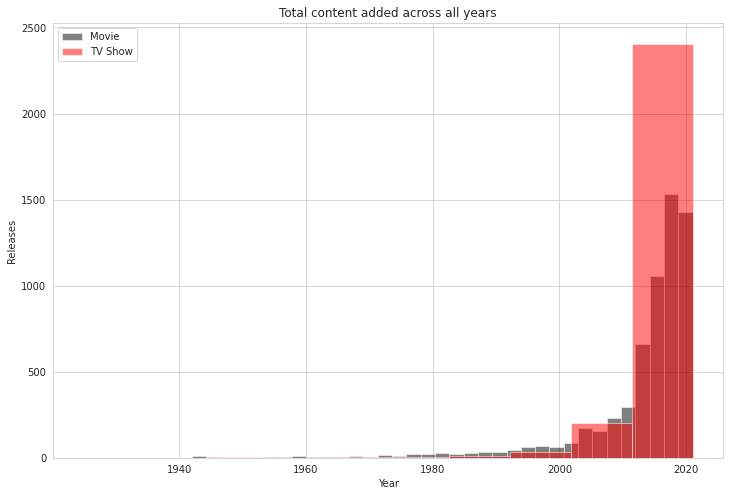

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
netflix_df_show_index[netflix_df_show_index.type=='Movie'].release_year.plot(bins=35, kind='hist', color='black', 
                                       label='Movie Release', alpha=0.5)
netflix_df_show_index[netflix_df_show_index.type=='TV Show'].release_year.plot(kind='hist', color='red', 
                                       label='Series Release', alpha=0.5) 
plt.title('Total content added across all years')
plt.legend(['Movie','TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()
